#### Describe

#### Packages and global settings

In [1]:
#Import packages
import pandas as pd
import csv
import matplotlib
from matplotlib import pyplot as plt
import numpy as np

#default font for matplotlib (sourced here: http://jonathansoma.com/lede/data-studio/matplotlib/changing-fonts-in-matplotlib/)
matplotlib.rcParams['font.sans-serif'] = "Times New Roman"
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"

##### f_open_exp_file()
Function to open sugarscape experiment file and calculate `steps`, the range of population across which experiments were ran `min_pop` -> `max_pop`

In [7]:
def f_open_exp_file(experiment_file,p_row_skip = 6):
    """Function to take it a Sugarscape experiment file and prep for analysis. Can be either SS1 or SS2"""
    
    #open file and skip rows
    open_file = pd.read_csv(experiment_file,skiprows = p_row_skip)
    #sort values
    open_file = open_file.sort_values(by = ["[run number]","[step]"])
    
    max_step = open_file["[step]"].max()
    max_pop = open_file["initial-population"].max()
    min_pop = open_file["initial-population"].min()
    
    print(f"Max step is {max_step}")
    
    return open_file,max_pop,min_pop,max_step

In [37]:
#Test
#experiment_file1 = "Expertiments/Sugarscape 1 Immediate Growback_AF Aggregate_Count_Metabolism_Vision-table_exp3.csv"
#f_open_exp_file(experiment_file1)[0].head()

##### f_exp_ref_tables()

Take output from `f_open_exp_file()` - specifically `data` (position 0) and `max step` (position 3) and calculate and return reference table for start and end tick positions

In [8]:
def f_exp_ref_tables(p_f_open_output):
    """Take in processed experiment data from f_open_exp_file() and use *dataframe* and *max_step*"""
    data = p_f_open_output[0]
    max_step = p_f_open_output[3]
    max_pop = p_f_open_output[1]
    min_pop = p_f_open_output[2]
    
    
    #STEP == MAX; Min, Median, Mean, Max for all columns at max step of dataset
    grouped_df = data[data["[step]"] == max_step].copy()

    df_mean = grouped_df.groupby("initial-population").mean()
    df_med = grouped_df.groupby("initial-population").median()
    df_min = grouped_df.groupby("initial-population").min()
    df_max = grouped_df.groupby("initial-population").max()

    #STEP == 0; Min, Median, Mean, Max for all columns at 0 step of dataset
    grouped_df_0 = data[data["[step]"] == 0].copy()

    df_mean_0 = grouped_df_0.groupby("initial-population").mean()
    df_med_0 = grouped_df_0.groupby("initial-population").median()
    df_min_0 = grouped_df_0.groupby("initial-population").min()
    df_max_0 = grouped_df_0.groupby("initial-population").max()
    
    #save all tables calculated
    end_tick_data = [grouped_df,df_mean,df_med,df_min,df_max,max_step,min_pop,max_pop,data]
    start_tick_data = [grouped_df_0,df_mean_0,df_med_0,df_min_0,df_max_0,max_step,min_pop,max_pop,data]
    
    #return list of list of objects
    return [start_tick_data,end_tick_data]


In [38]:
#Test
#experiment_file1 = "Expertiments/Sugarscape 1 Immediate Growback_AF Aggregate_Count_Metabolism_Vision-table_exp3.csv"
#f_exp_ref_tables(f_open_exp_file(experiment_file1))[0][1].head()

#### f_abm_hypothesis_end()

This function processes data from inputed path and produces visual for desired column for the end-state only

In [60]:
#Hypothesis function, requires grouped tables generated previously
def f_abm_hypothesis_end(p_column_name,p_exp_data_path,p_title = None,p_y_minmax = False):
    
    #KEY VARIABLES =============================================
    loaded_data = f_exp_ref_tables(f_open_exp_file(p_exp_data_path))
    #loaded_data[0] is starting tick data
    #loaded_data[1] is final tick data
    
    df_mean = loaded_data[1][1]
    df_med = loaded_data[1][2]
    df_min = loaded_data[1][3]
    df_max = loaded_data[1][4]
    max_step = loaded_data[1][5]
    min_pop = loaded_data[1][6]
    max_pop = loaded_data[1][7]

    
    #===========================================================
    #PART A - DATA PREP
    
    #set up df
    h_df = pd.DataFrame(df_mean[p_column_name].copy())
    #rename column
    h_df.rename(columns ={h_df.columns[0]: "Mean"},inplace= True)

    #append min and max
    h_df["Min"] = df_min[p_column_name].copy()
    h_df["Max"] = df_max[p_column_name].copy()
    
    #===========================================================
    #PART B - VISUALISE

    #Figure set up
    plt.figure(figsize = (7.5,5),dpi = 300)
    plt.title(p_title, loc = "left")
    
    if p_y_minmax is False:
        pass
    else:
        plt.ylim(top = p_y_minmax[1], bottom = p_y_minmax[0])
    
    plt.xlim(right = max_pop+100, left = min_pop-100)
    
    #Plot line
    plt.plot(h_df.index, h_df.Mean, '#0080ff')
    #Fill space between min and max
    plt.fill_between(h_df.index, h_df.Min, h_df.Max,alpha = 0.075, color = "#0080ff")

    #mean of means line in (---)
    plt.hlines(h_df.Mean.mean(),xmin = min_pop,xmax = max_pop,colors = "#000080",linestyles = "dashed",label = "Mean population remaining")
    
    #add faint grid lines to charts[https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.grid.html]
    plt.grid(color = "grey", linestyle = "-", linewidth = 0.5, alpha = 0.5)


    print(f"Mean of means at step {max_step} across all populations is {h_df.Mean.mean()}")
    
    #return dataframe and visual
    return #h_df

In [39]:
#Test
#test_data_path = "Expertiments/Sugarscape 1 Immediate Growback_AF Aggregate_Count_Metabolism_Vision-table_exp3.csv"
#test_data_column_name = "(count turtles) / (initial-population)"
#test_data_column_name = "mean [metabolism] of turtles"

#f_abm_hypothesis_end(
#    p_column_name=test_data_column_name,
#    p_exp_data_path=test_data_path,
#    p_title= "Figure 3.2.3 | SS1 | Proportion of population remaining at the end of simulation ",
#    p_y_minmax= [1.5,3])

#### f_abm_hypothesis_start_end()

This function processes data from inputed path and produces visual for desired column for BOTH the start state and end-state

In [68]:
#START AND END COMPARISON
#Hypothesis function, requires grouped tables generated previously

def f_abm_hypothesis_start_end(p_column_name,p_exp_data_path,p_title = None,p_y_minmax = False):
    
    #red colour palette: https://www.color-hex.com/color-palette/88339
    #blue colour palette: https://www.color-hex.com/color-palette/88131
    
    
    #KEY VARIABLES =============================================
    loaded_data = f_exp_ref_tables(f_open_exp_file(p_exp_data_path))

    #loaded_data[1] is final tick data
    df_mean = loaded_data[1][1]
    df_med = loaded_data[1][2]
    df_min = loaded_data[1][3]
    df_max = loaded_data[1][4]
    max_step = loaded_data[1][5]
    min_pop = loaded_data[1][6]
    max_pop = loaded_data[1][7]
    
    #loaded_data[0] is starting tick data
    df_mean_0 = loaded_data[0][1]
    df_med_0 =  loaded_data[0][2]
    df_min_0 =  loaded_data[0][3]
    df_max_0 =  loaded_data[0][4]
    
    #===========================================================
    #PART A - DATA PREP
    
    #set up df
    h_df = pd.DataFrame(df_mean[p_column_name].copy())
    #rename column
    h_df.rename(columns ={h_df.columns[0]: "Mean"},inplace= True)

    #append min and max
    h_df["Min"] = df_min[p_column_name].copy()
    h_df["Max"] = df_max[p_column_name].copy()
    
    #set up df_0
    h_df_0 = pd.DataFrame(df_mean_0[p_column_name].copy())
    #rename column
    h_df_0.rename(columns ={h_df_0.columns[0]: "Mean"},inplace= True)

    #append min and max
    h_df_0["Min"] = df_min_0[p_column_name].copy()
    h_df_0["Max"] = df_max_0[p_column_name].copy()
    
    #===========================================================
    #PART B - VISUALISE
    
    #Figure set up
    plt.figure(figsize = (7.5,5),dpi = 300)
    plt.title(p_title, loc = "left")
    
    if p_y_minmax is False:
        pass
    else:
        plt.ylim(top = p_y_minmax[1], bottom = p_y_minmax[0])
    
    plt.xlim(right = max_pop+100, left = min_pop-100)
    
     #Plot MAX line (BLUE)
    plt.plot(h_df.index, h_df.Mean, "#0080ff",)
    #Fill space between min and max
    plt.fill_between(h_df.index, h_df.Min, h_df.Max,alpha = 0.075, color = "#0080ff")
    #mean of means line in (---)
    plt.hlines(h_df.Mean.mean(),xmin = min_pop,xmax = max_pop,colors = "#000080",linestyles = "dashed",label = "Mean population remaining")
    
    #Plot ZERO line (RED)
    plt.plot(h_df_0.index, h_df_0.Mean, "#cc1d1d")
    #Fill space between min and max
    plt.fill_between(h_df_0.index, h_df_0.Min, h_df_0.Max,alpha = 0.075, color = "#cc1d1d")
    #mean of means line in (---)
    plt.hlines(h_df_0.Mean.mean(),xmin = min_pop,xmax = max_pop,colors = "#5e1616",linestyles = "dashed",label = "Mean population remaining")

    
    #add faint grid lines to charts[https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.grid.html]
    plt.grid(color = "grey", linestyle = "-", linewidth = 0.5, alpha = 0.5)
    
    print(f"Mean of means at step {max_step} across all populations is {h_df.Mean.mean()}")
    
    #return dataframe and visual
    return #h_df

In [41]:
#TEST START-END
#test_data_path = "Expertiments/Sugarscape 1 Immediate Growback_AF Aggregate_Count_Metabolism_Vision-table_exp3.csv"
#test_data_column_name2 = "mean [metabolism] of turtles"

#f_abm_hypothesis_start_end(
#    p_column_name=test_data_column_name2,
#    p_exp_data_path=test_data_path,
#    p_title= "Figure 3.2.3 | SS1 | Proportion of population remaining at the end of simulation ",
#    p_y_minmax= [0.35,0.8])

### Hypothesis testing


In [50]:
#DATA

#50 population intervals from 100 - 1500, 30 repetitions across 100 ticks
ss1_experiment = "Expertiments/Sugarscape 1 Immediate Growback_AF Aggregate_Count_Metabolism_Vision-table_exp6.csv"
ss2_experiment = "Expertiments/Sugarscape 2 Constant Growback_AF ABM_Assignment_solo-table_exp5.csv"

#view tables
#f_open_exp_file(ss1_experiment)[0].head()
#f_open_exp_file(ss2_experiment)[0].head()

#### H2

Max step is 100
Mean of means at step 100 across all populations is 0.6077934389369799
Max step is 100
Mean of means at step 100 across all populations is 0.4968888082518896


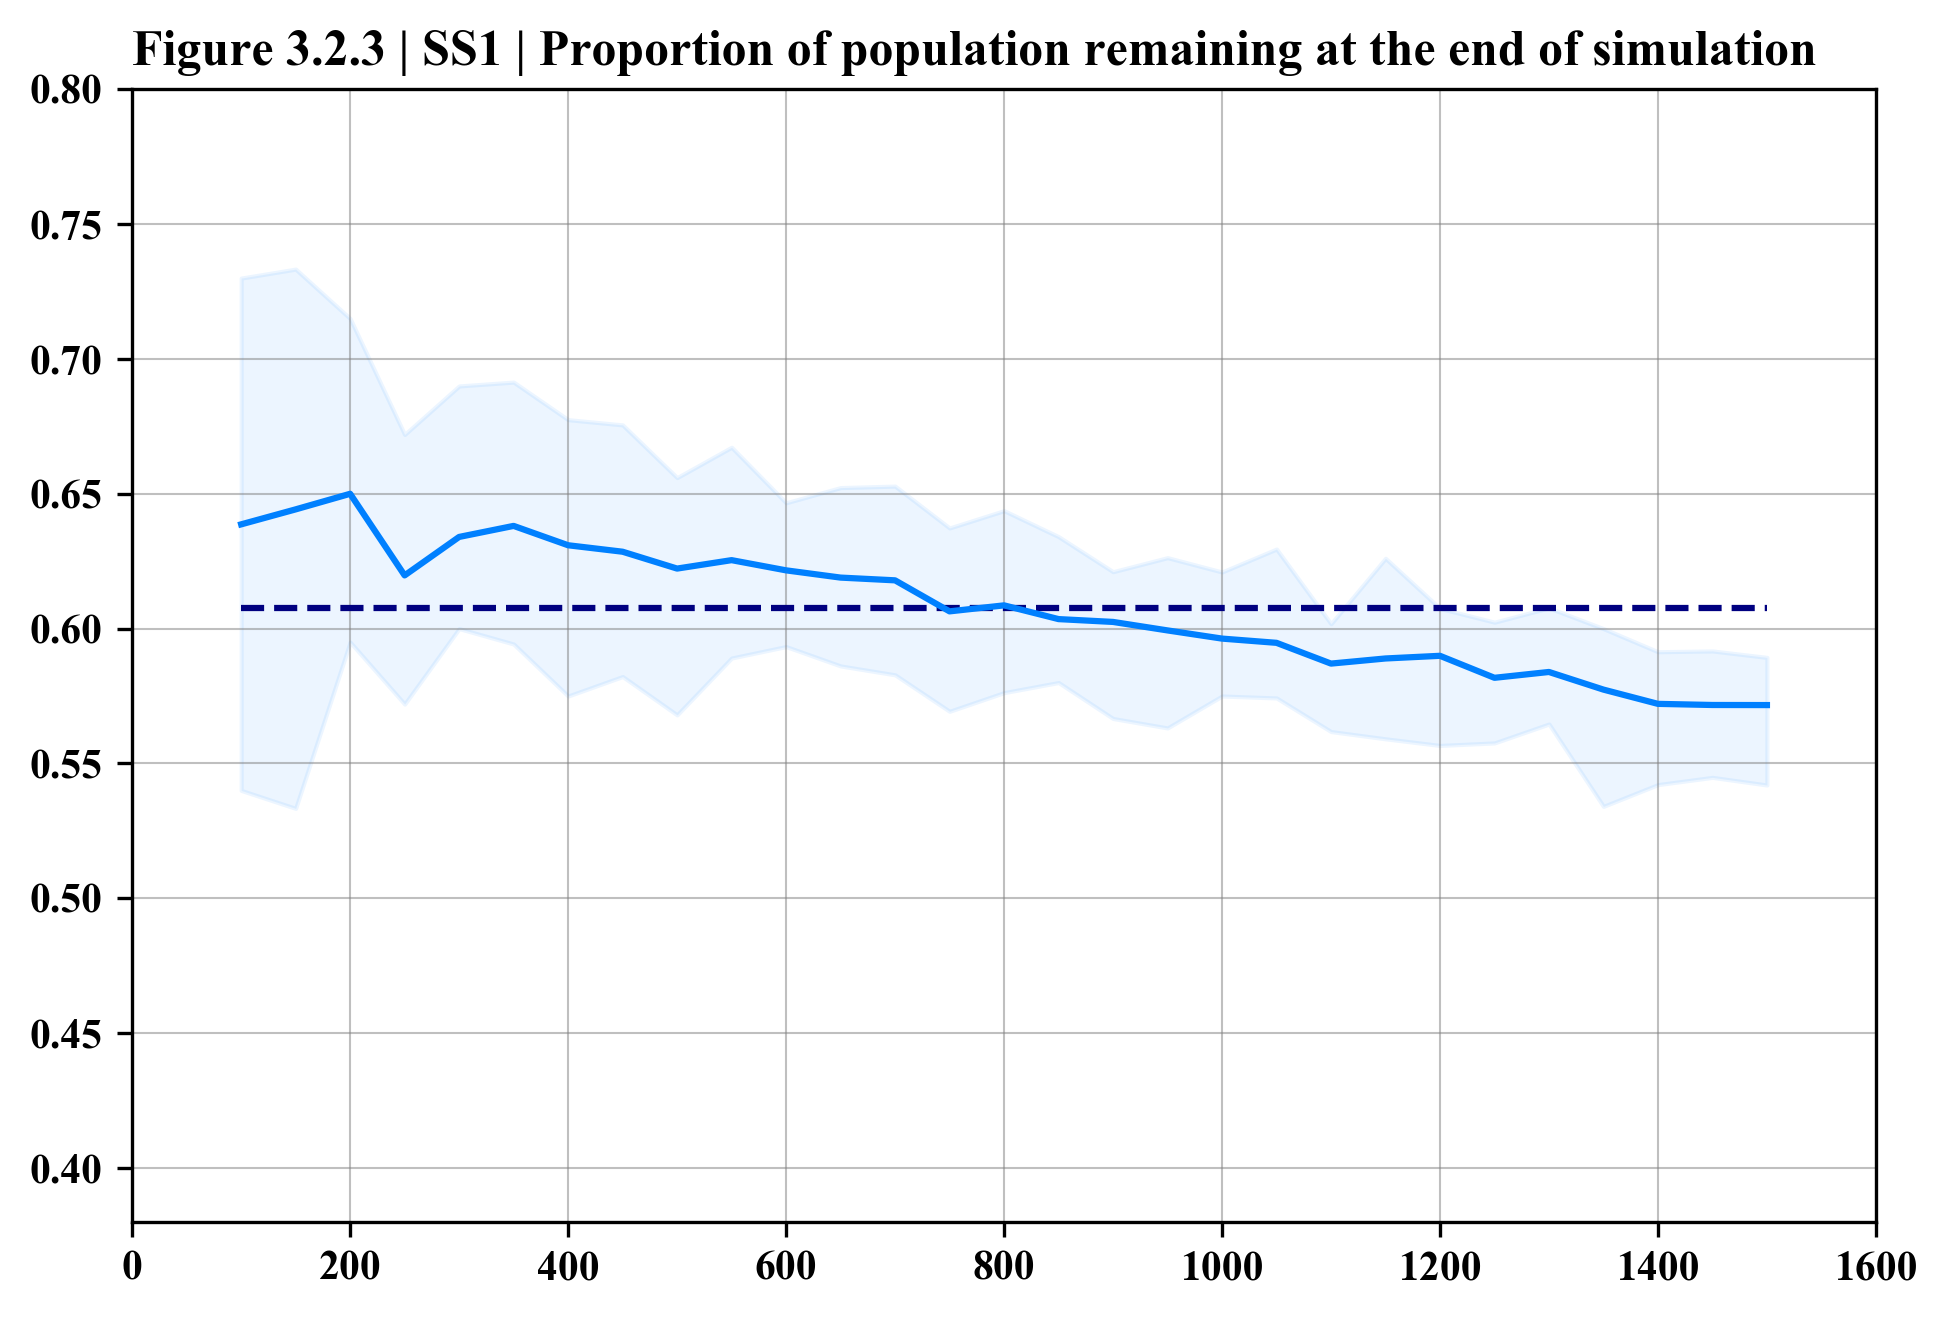

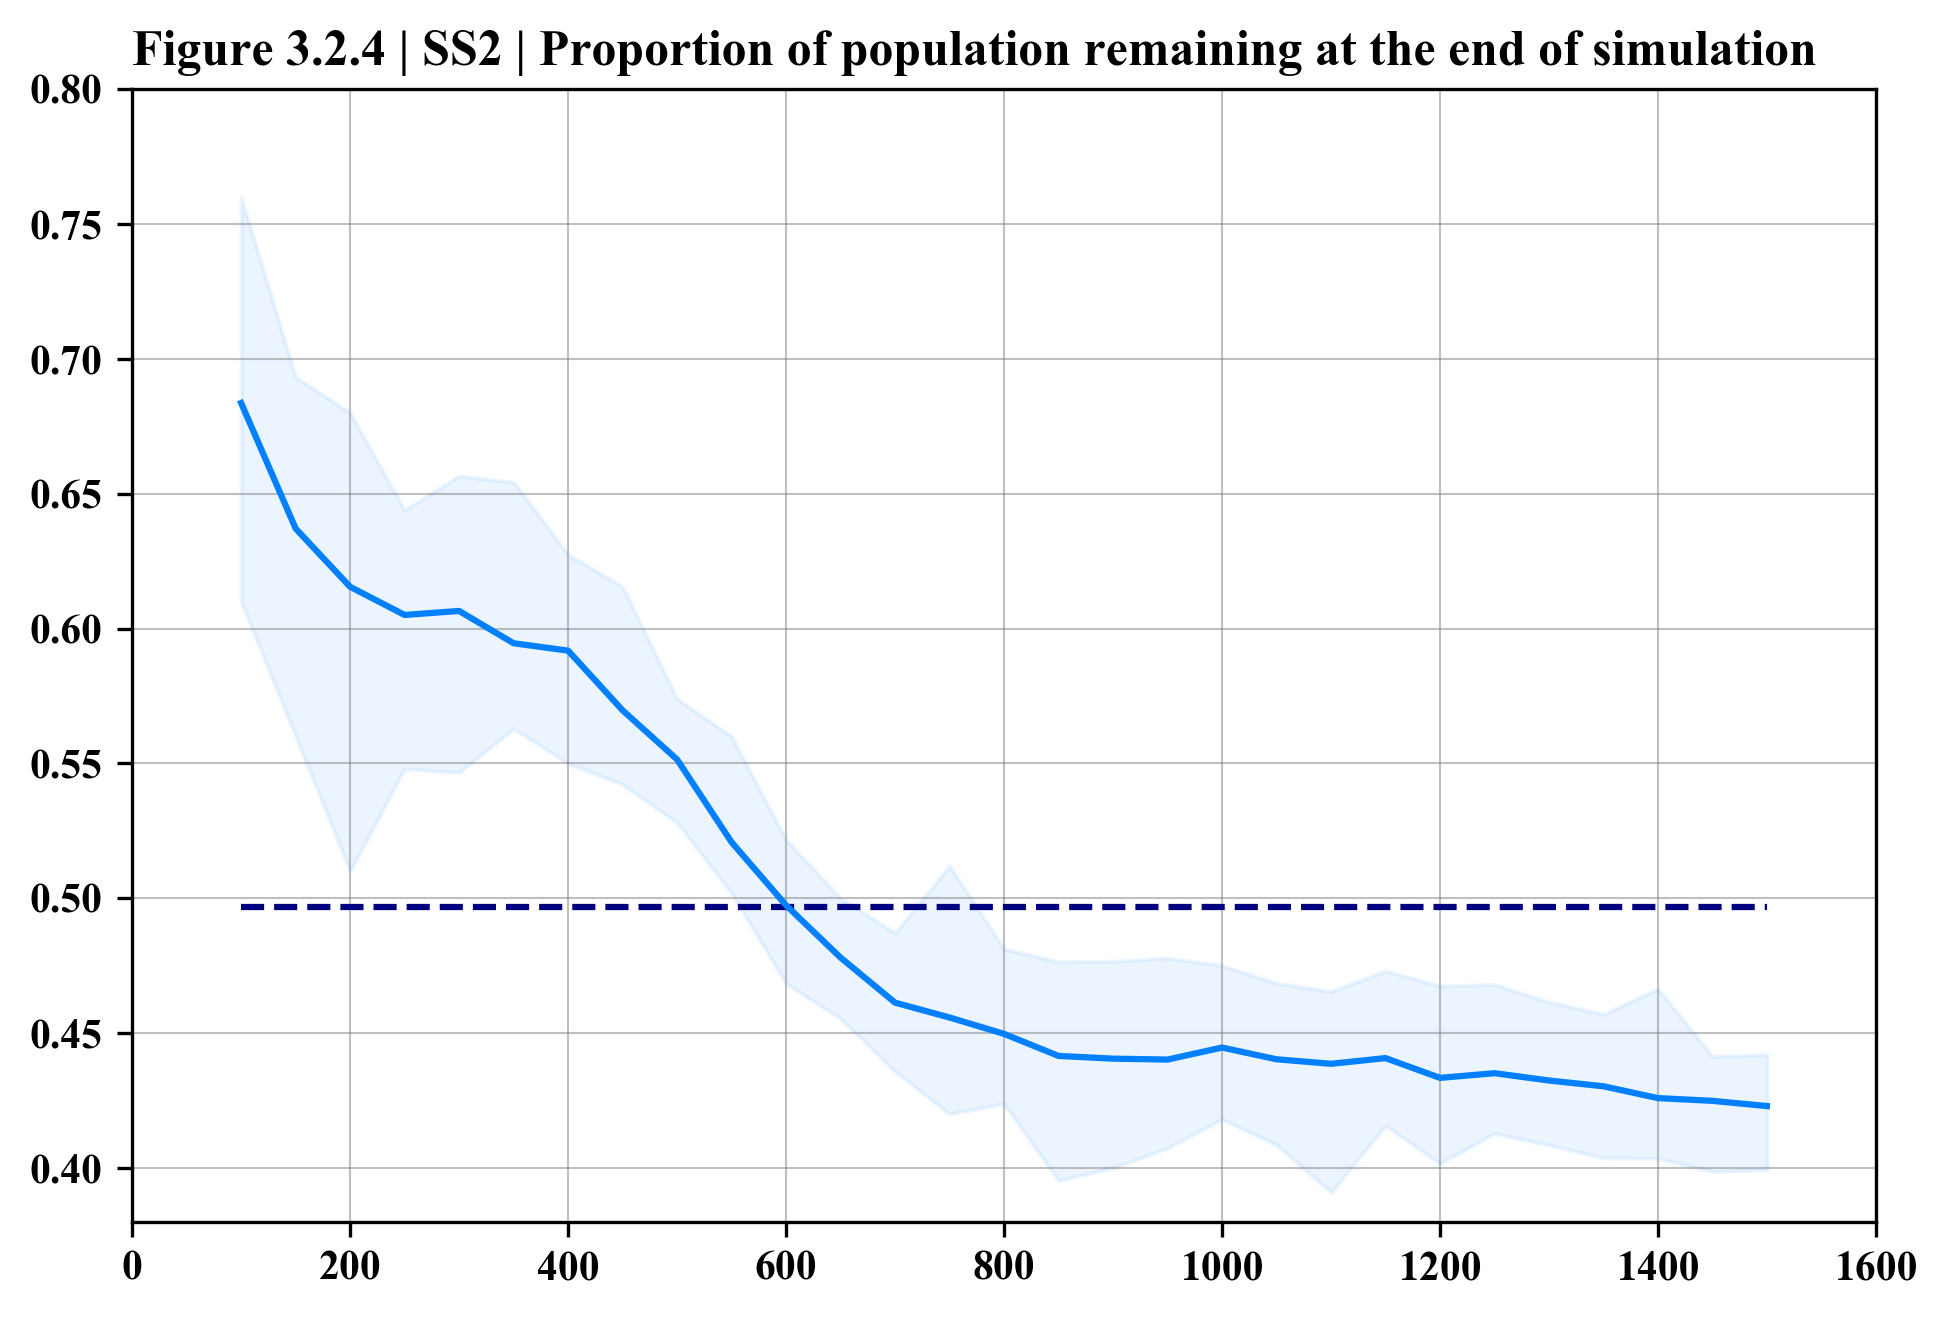

In [61]:
###Hypothesis set up SS1
column = "(count turtles) / (initial-population)"
title = "Figure 3.2.3 | SS1 | Proportion of population remaining at the end of simulation "
common_y_axes = [0.38,0.8] #else make it False


###Run analysis
f_abm_hypothesis_end(
    p_column_name = column,
    p_exp_data_path = ss1_experiment,
    p_title = title,
    p_y_minmax = common_y_axes)

###Hypothesis set up SS2
title2 = "Figure 3.2.4 | SS2 | Proportion of population remaining at the end of simulation "

###Run analysis
f_abm_hypothesis_end(
    p_column_name = column,
    p_exp_data_path = ss2_experiment,
    p_title = title2,
    p_y_minmax = common_y_axes)

#### H3 - metabolic rate

Max step is 100
Mean of means at step 100 across all populations is 1.977078340718163
Max step is 100
Mean of means at step 100 across all populations is 1.6191041346365194


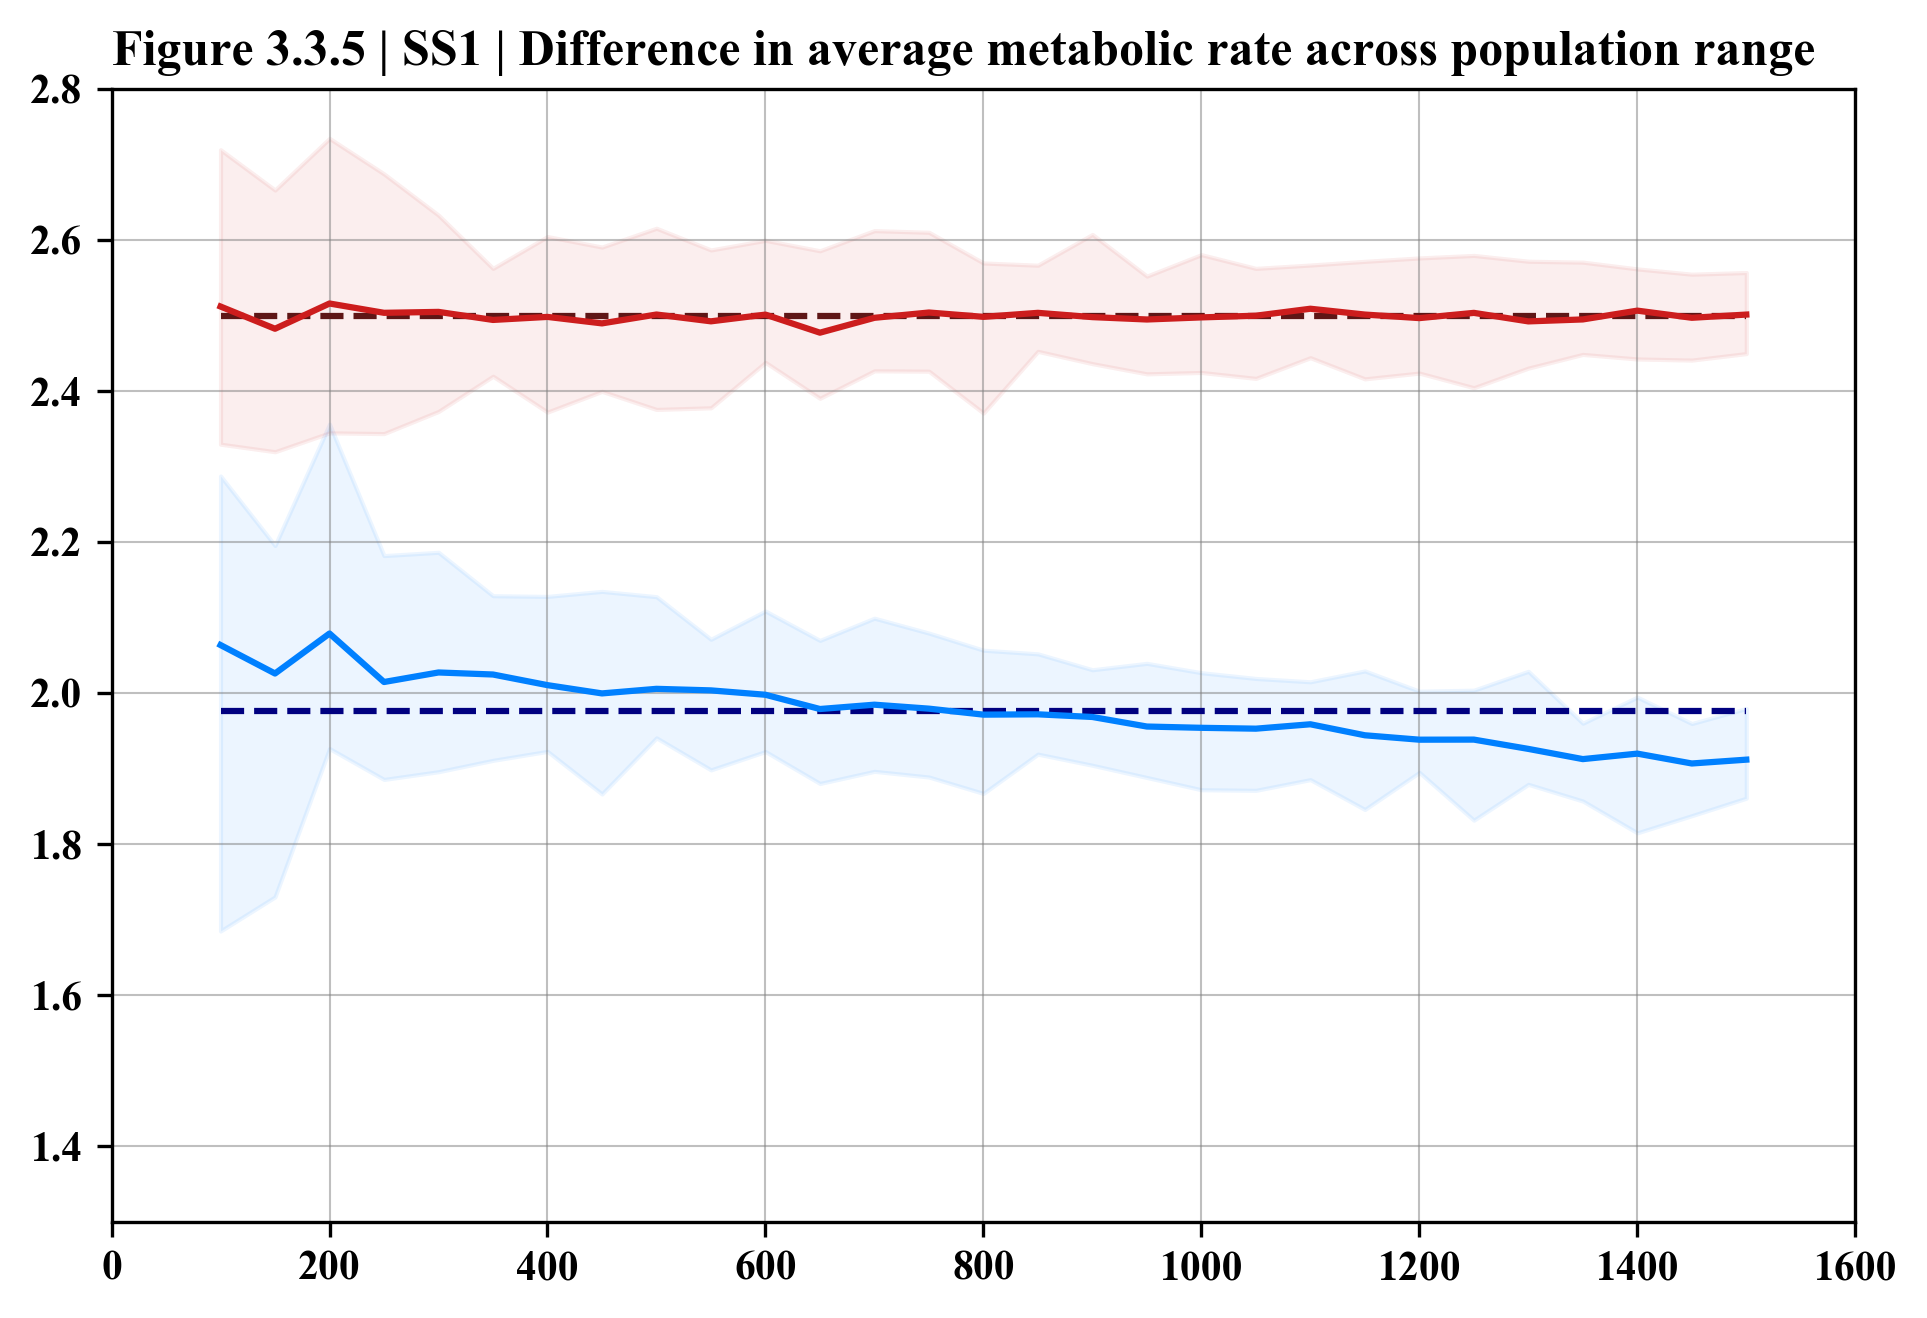

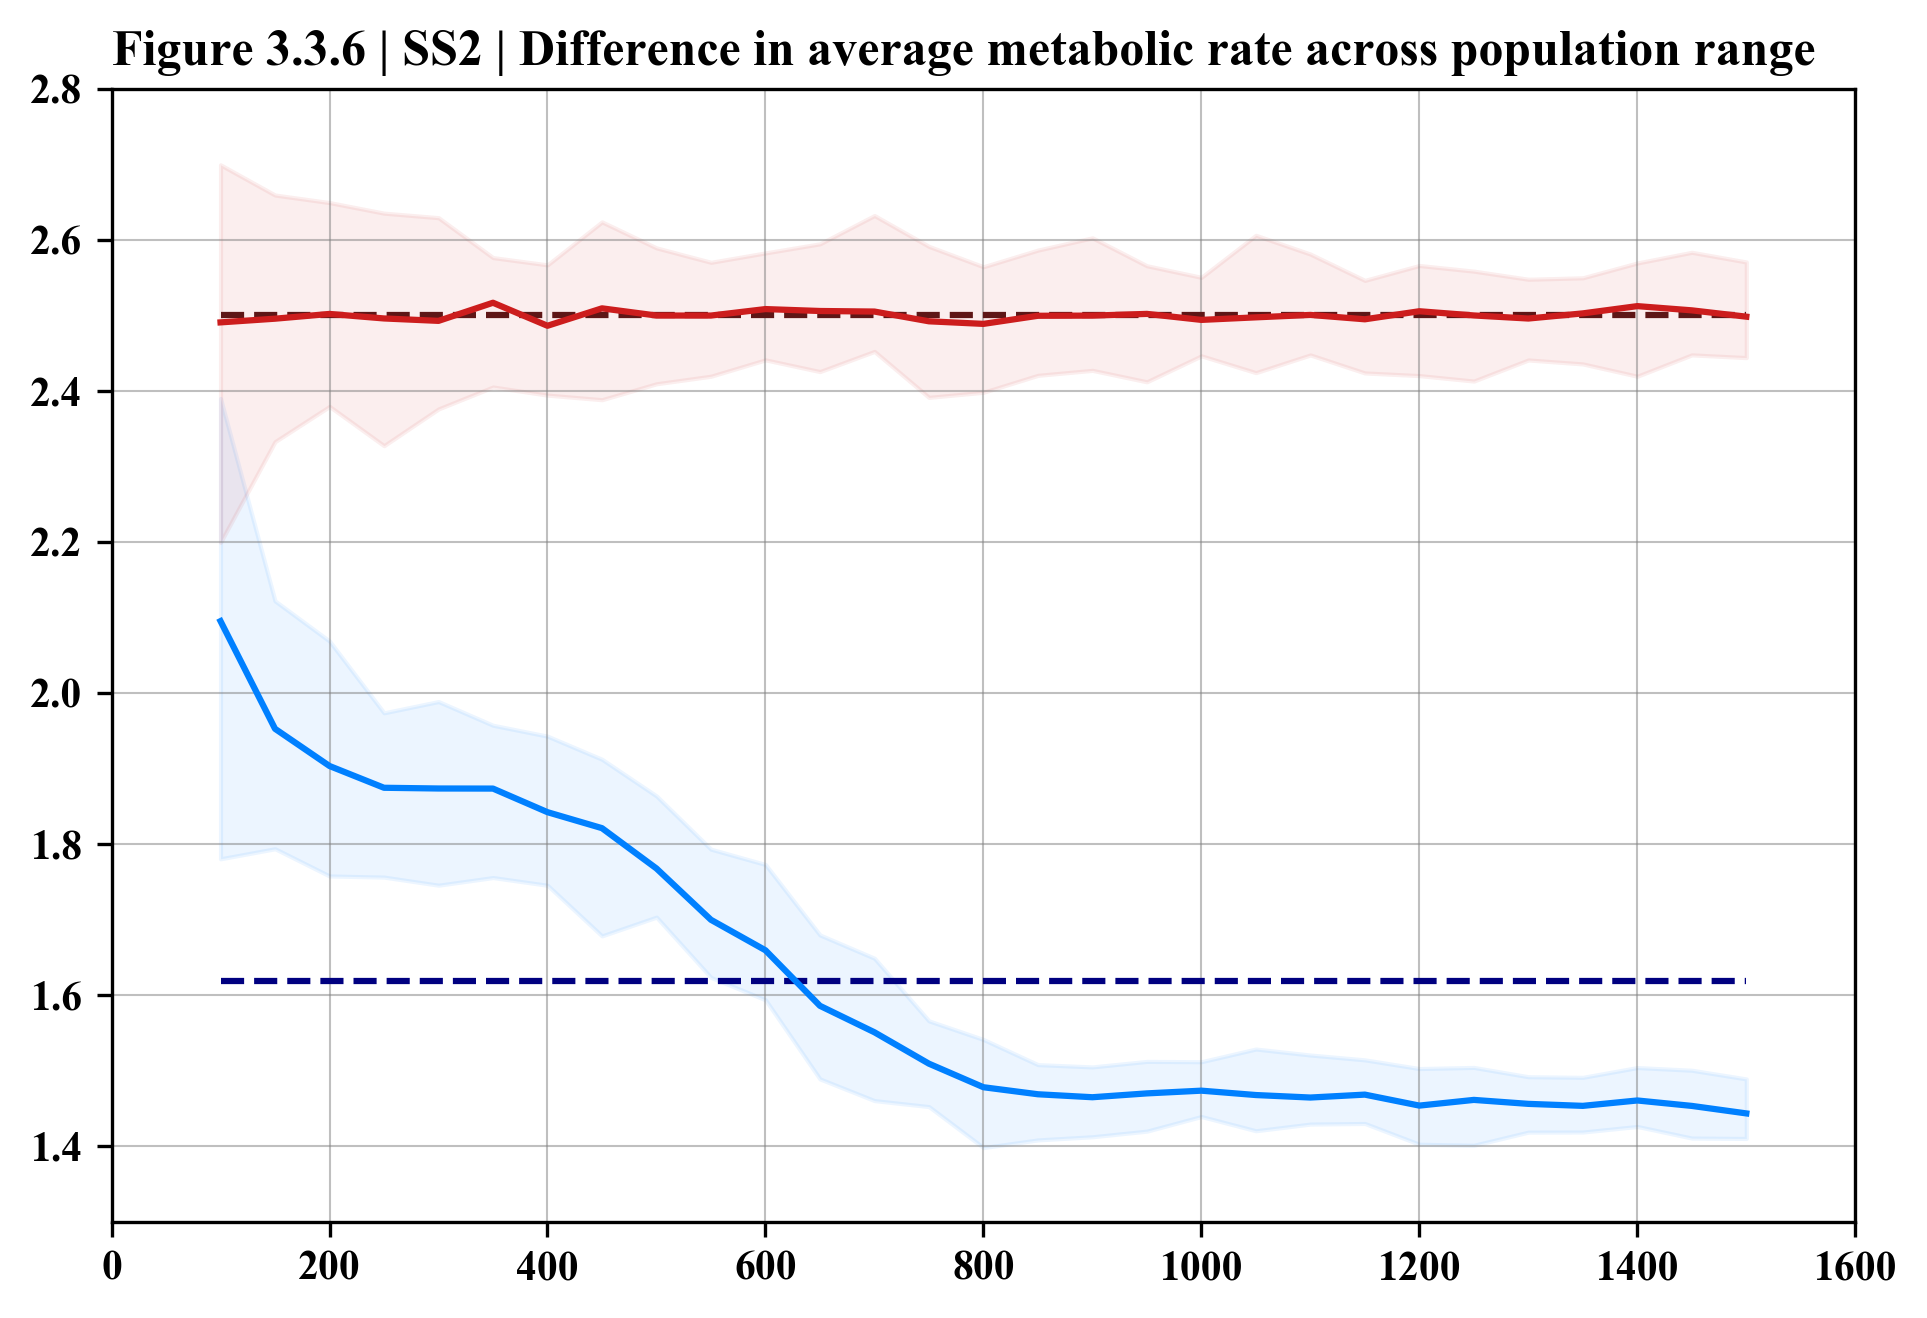

In [90]:
###Common set up
title = "Difference in average metabolic rate across population range"
column = "mean [metabolism] of turtles"
common_y_axes = [1.3,2.8] #else make it False

###Custom title set up
title_pre = "Figure 3.3.5 | SS1 | "
title_pre2 = "Figure 3.3.6 | SS2 | "

###Run analysis SS1
f_abm_hypothesis_start_end(
    p_column_name = column,
    p_exp_data_path = ss1_experiment,
    p_title = title_pre+title,
    p_y_minmax = common_y_axes)

###Run analysis SS2
f_abm_hypothesis_start_end(
    p_column_name = column,
    p_exp_data_path = ss2_experiment,
    p_title = title_pre2+ title,
    p_y_minmax = common_y_axes)

#### H4 - vision

Max step is 100
Mean of means at step 100 across all populations is 3.739353484139915
Max step is 100
Mean of means at step 100 across all populations is 3.703618131955299


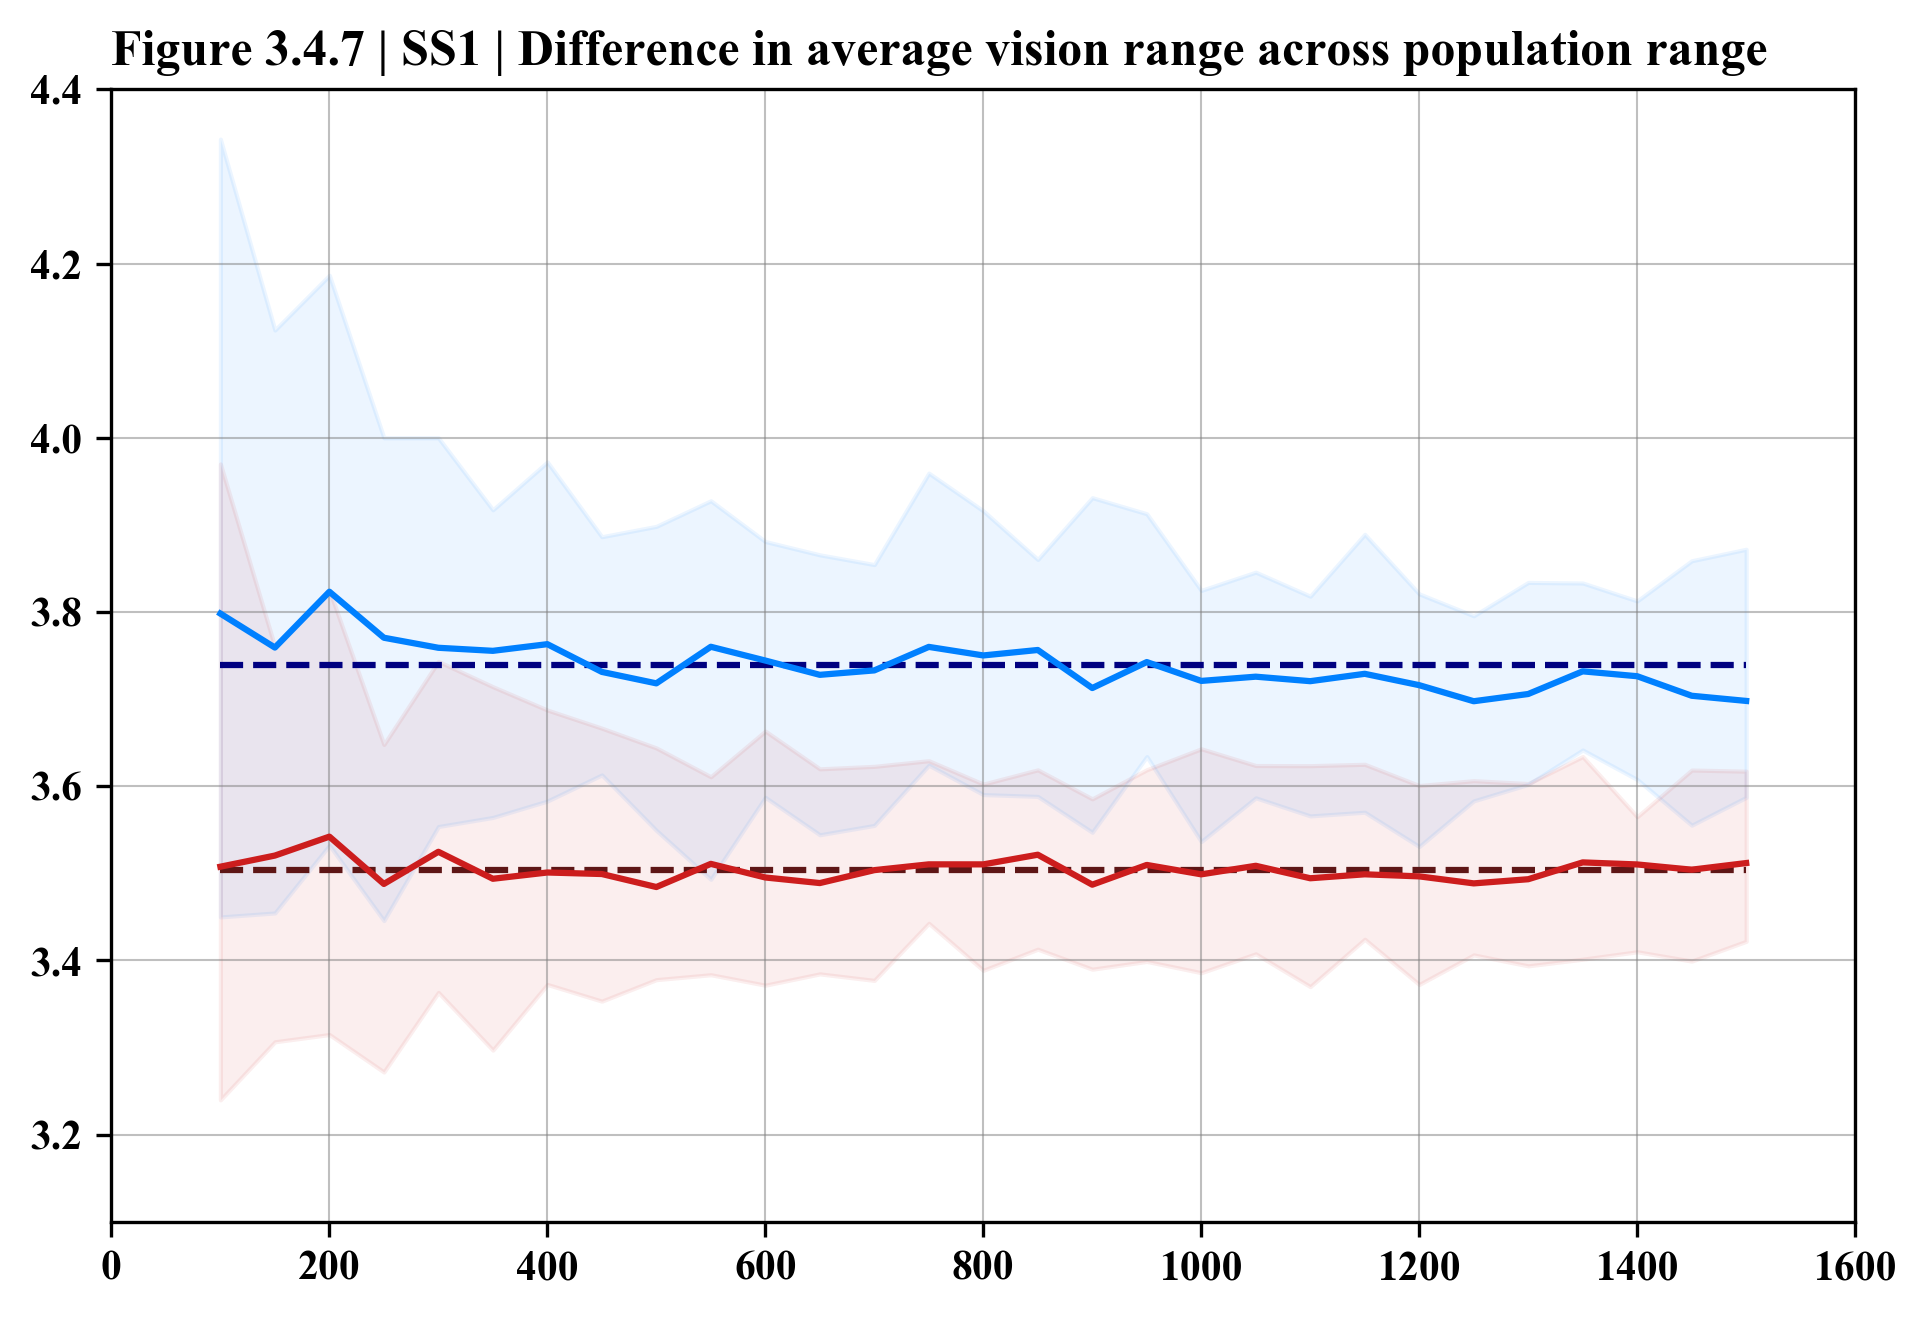

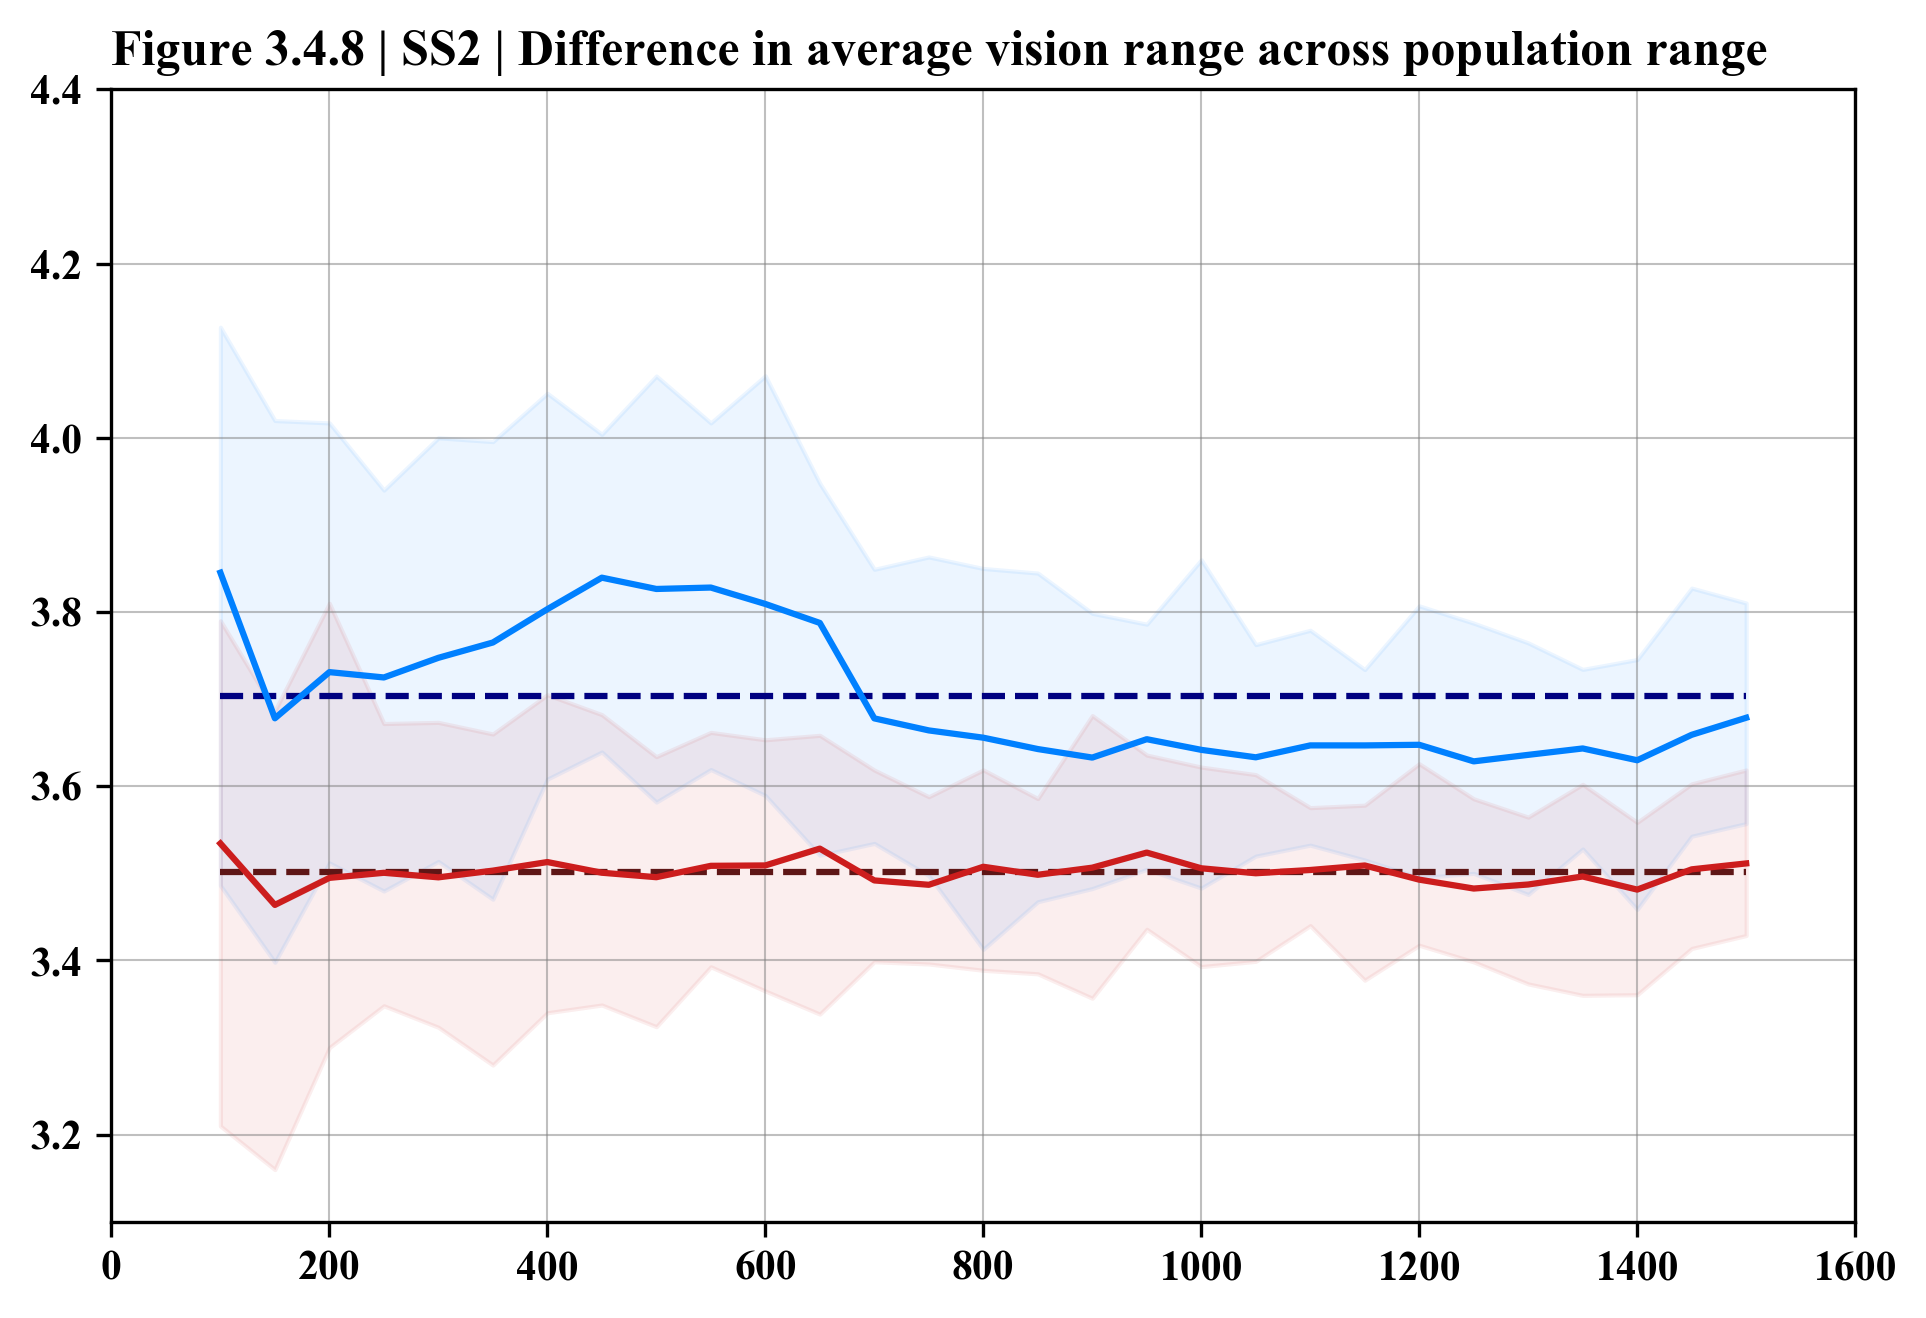

In [88]:
###Common set up
title = "Difference in average vision range across population range"
column = "mean [vision] of turtles"
common_y_axes = [3.1,4.4] #else make it False

###Custom title set up
title_pre = "Figure 3.4.7 | SS1 | "
title_pre2 = "Figure 3.4.8 | SS2 | "

###Run analysis SS1
f_abm_hypothesis_start_end(
    p_column_name = column,
    p_exp_data_path = ss1_experiment,
    p_title = title_pre+title,
    p_y_minmax = common_y_axes)

###Run analysis SS2
f_abm_hypothesis_start_end(
    p_column_name = column,
    p_exp_data_path = ss2_experiment,
    p_title = title_pre2+ title,
    p_y_minmax = common_y_axes)

### H1 Calculate warm-up period

In [95]:
#isolate all runs with 100 population (but rememeber each scenario was run multiple times)

#SS1 only!
open_file = f_open_exp_file(ss2_experiment)[0]

#max runs to know
max_runs = open_file["[run number]"].max()
#list to use for for loop
all_runs = open_file["[run number]"].unique()
#empty list to store number of ticks until steady state in
all_run_steady_mark = []


for run in all_runs:
    
    #filter experiment by run number
    temp_series = open_file[open_file["[run number]"] == run]["count turtles"]
    #find steady state population (the minimum)
    temp_min = temp_series.min()
    
    temp_counter = 0
    
    #count the number of ticks until settled state
    #for every entry, if we don't have a match to the steady population, add one to counter, else break
    for entry in temp_series:
        if entry != temp_series.min():
            temp_counter += 1
        else:
            break 
    
    #choose one option
    temp_append = [run,temp_counter]
    #temp_append = temp_counter
    
    all_run_steady_mark.append(temp_append)
    
steady_df = pd.DataFrame(all_run_steady_mark)

Max step is 100


In [96]:
#This tells us after how many ticks a steady state was reached meaning the next tick was the equilibirum tick
average_warm_up = steady_df[1].mean()

print(f"The average warm-up period is {average_warm_up}.\nWhich makes sense given the max initial allocation of sugar of 25")

The average warm-up period is 76.10459770114943.
Which makes sense given the max initial allocation of sugar of 25


In [97]:
#SS2 summary
steady_df.describe()

,0,1
count,870.000000,870.000000
mean,435.500000,76.104598
std,251.291663,19.985308
min,1.000000,29.000000
25%,218.250000,59.000000
50%,435.500000,82.500000
75%,652.750000,94.000000
max,870.000000,100.000000


In [94]:
#SS1 summary
steady_df.describe()

,0,1
count,870.000000,870.000000
mean,435.500000,24.940230
std,251.291663,0.344097
min,1.000000,20.000000
25%,218.250000,25.000000
50%,435.500000,25.000000
75%,652.750000,25.000000
max,870.000000,25.000000
